# Análise e Exploração dos Dados

In [56]:
# Importações
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import nltk
from collections import  Counter
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import gensim
import pyLDAvis.gensim_models
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
# downloads
# nltk.download("stopwords")
# nltk.download('punkt')
# nltk.download('wordnet')

### Importando os datasets

In [3]:
falsas = pd.read_csv('./datasets/falsas.csv')
falsas.head(2)

,Unnamed: 0,Titulo,Categoria,Resumo,Status
0,0,Fenômeno Aphelion chega amanhã e vai trazer n...,ciencia,"Terra vai ficar mais longe do Sol amanhã, por ...",1
1,1,Asteroide 2009 JF1 vai destruir a Terra em ma...,ciencia,Asteroide de 130 metros e com força de 250 mil...,1


In [4]:
verdadeiras = pd.read_csv('./datasets/verdadeiras.csv')
verdadeiras.head(2)

,Unnamed: 0,Titulo,Categoria,Resumo,Status
0,0,"Max Born, o físico quântico que alertou o mund...",ciencia,"Avô de Olivia Newton-John e amigo de Einstein,...",0
1,1,“A contenção do idoso é uma manifestação de et...,ciencia,O enfermeiro Rômulo Delvalle faz parte do Mini...,0


In [5]:
# Balancear os dataframes

diff = verdadeiras.shape[0] - falsas.shape[0] 
verdadeiras = verdadeiras.iloc[diff:]
verdadeiras.shape[0] - falsas.shape[0] 

0

In [6]:
falsas.isnull().sum()

Unnamed: 0    0
Titulo        0
Categoria     0
Resumo        0
Status        0
dtype: int64

In [7]:
verdadeiras.isnull().sum()

Unnamed: 0    0
Titulo        0
Categoria     0
Resumo        0
Status        0
dtype: int64

In [8]:
print('\033[1m' + 'Dataset de Notícias Falsas' + '\033[0m')

print('\nExistem {} observações e {} features. \n'.format(falsas.shape[0], falsas.shape[1]))

categorias = falsas.groupby('Categoria').count()

print(f'Quantidade de registros por categoria:\n {categorias}')

print('-------------------------------------------------')

print('\033[1m' + 'Dataset de Notícias Verdadeiras' + '\033[0m')

print('\nExistem {} observações e {} features. \n'.format(verdadeiras.shape[0], verdadeiras.shape[1]))

categorias = verdadeiras.groupby('Categoria').count()

print(f'Quantidade de registros por categoria:\n {categorias}')

Dataset de Notícias Falsas

Existem 3672 observações e 5 features. 

Quantidade de registros por categoria:
             Unnamed: 0  Titulo  Resumo  Status
Categoria                                     
ciencia            150     150     150     150
mundo              801     801     801     801
politica           993     993     993     993
saude              952     952     952     952
tecnologia         776     776     776     776
-------------------------------------------------
Dataset de Notícias Verdadeiras

Existem 3672 observações e 5 features. 

Quantidade de registros por categoria:
             Unnamed: 0  Titulo  Resumo  Status
Categoria                                     
mundo              861     861     861     861
politica           881     881     881     881
saude              948     948     948     948
tecnologia         982     982     982     982


In [9]:
falsas['Titulo'].str.len().mean()

74.49754901960785

In [10]:
verdadeiras['Titulo'].str.len().mean()

82.1628540305011

In [11]:
falsas['Resumo'].str.len().mean()

145.27287581699346

In [12]:
verdadeiras['Resumo'].str.len().mean()

161.35348583877996

In [13]:
falsas['Titulo'].str.len().max()

201

In [14]:
verdadeiras['Titulo'].str.len().max()

164

In [44]:
stopwords = nltk.corpus.stopwords.words("portuguese")
outras_stopwords = ['O','A', 'sobre', 'pode', 'ainda', 'após', 'ano', 'diz', 'disse', 'vai', 'anos', 'país', 'outro', 'desde', 'durante',
                       'link', 'Para', 'video', 'Vídeo', 'link', 'site','contra', 'whatsapp']
stopwords.extend(outras_stopwords)

### Caracteres por sentença

In [17]:
def hist_char_por_sentenca(df):
    df.str.len().hist()

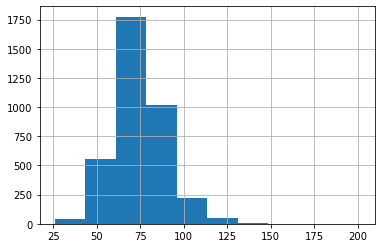

In [18]:
hist_char_por_sentenca(falsas['Titulo'])

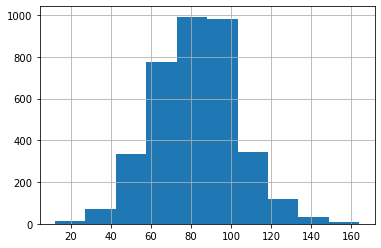

In [19]:
hist_char_por_sentenca(verdadeiras['Titulo'])

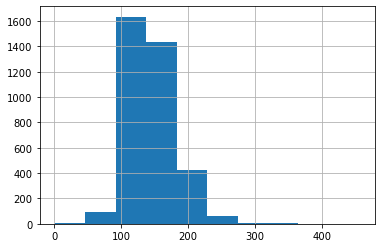

In [20]:
hist_char_por_sentenca(falsas['Resumo'])

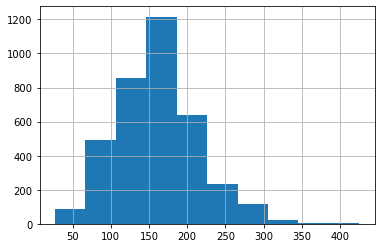

In [21]:
hist_char_por_sentenca(verdadeiras['Resumo'])

### Número de palavras

In [22]:
def hist_palavras(df):
    df.str.split().\
    apply(lambda x : [len(i) for i in x]). \
    map(lambda x: np.mean(x)).hist()

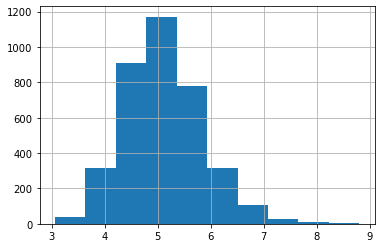

In [23]:
hist_palavras(falsas['Titulo'])

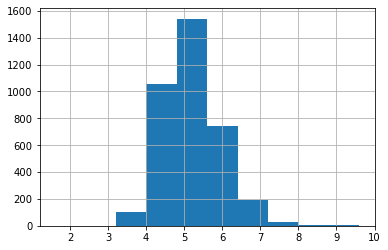

In [24]:
hist_palavras(verdadeiras['Titulo'])

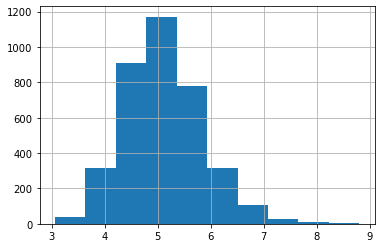

In [25]:
hist_palavras(falsas['Titulo'])

In [26]:
def plot_top_non_stopwords_barchart(text):
    #stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stopwords):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

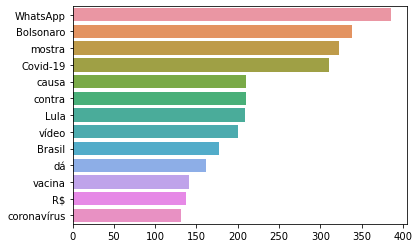

In [27]:
plot_top_non_stopwords_barchart(falsas['Titulo'])

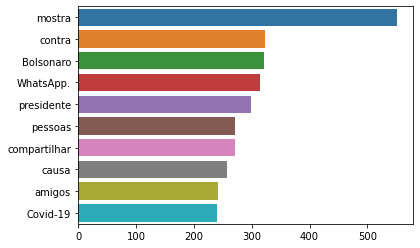

In [28]:
plot_top_non_stopwords_barchart(falsas['Resumo'])

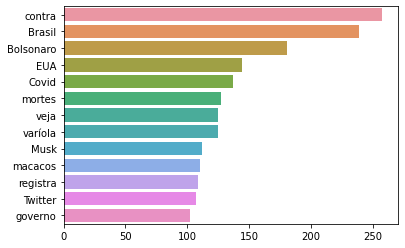

In [29]:
plot_top_non_stopwords_barchart(verdadeiras['Titulo'])

In [30]:
#?WordCloud

In [31]:
stopwords = nltk.corpus.stopwords.words("portuguese")
outras_stopwords = ['sobre', 'pode', 'ainda', 'após', 'ano', 'diz', 'disse', 'vai', 'anos', 'país','whatsapp', 'outro', 'desde', 'durante']
stopwords.extend(outras_stopwords)

In [32]:
def gera_nuvem(df, titulo):
    textos = ''.join(resumo for resumo in df)
    print ('Existem {} palavras.'.format(len(textos))) 
    
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(textos)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titulo)
    plt.axis("off")
    plt.show()

Existem 273555 palavras.


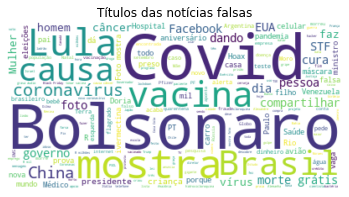

Existem 301702 palavras.


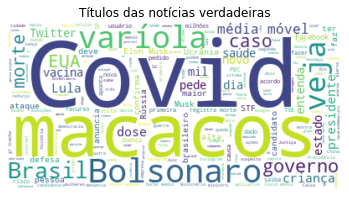

In [45]:
gera_nuvem(falsas['Titulo'], 'Títulos das notícias falsas')
#gera_nuvem(falsas['Resumo'], 'Resumos das notícias falsas')
gera_nuvem(verdadeiras['Titulo'], 'Títulos das notícias verdadeiras')
#gera_nuvem(verdadeiras['Resumo'], 'Resumos das notícias verdadeiras')

Ngramas

In [34]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

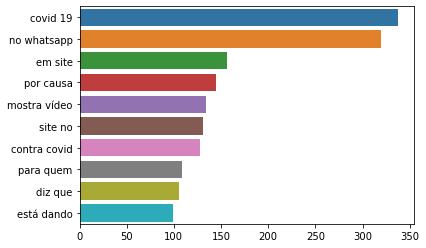

In [35]:
top_n_bigrams=get_top_ngram(falsas['Titulo'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

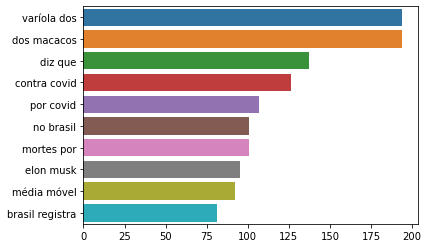

In [36]:
top_n_bigrams=get_top_ngram(verdadeiras['Titulo'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

Exploração de modelagem de tópicos com pyLDAvis

In [37]:
def preprocessa_noticia(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for news in df['Titulo']:
        words=[w for w in word_tokenize(news) if (w not in stopwords)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus_falsas = preprocessa_noticia(falsas)
corpus_verdadeiras = preprocessa_noticia(verdadeiras)

In [54]:
#corpus_falsas[50:]

In [55]:
#corpus_verdadeiras[100:]

## Train-test-split

In [62]:
merge = pd.concat([falsas, verdadeiras])

In [71]:
merge.drop(["Unnamed: 0"], axis=1, inplace=True)

In [74]:
merge.columns

Index(['Titulo', 'Categoria', 'Resumo', 'Status'], dtype='object')

In [75]:
X = merge[['Titulo', 'Categoria', 'Resumo']]
X

,Titulo,Categoria,Resumo
0,Fenômeno Aphelion chega amanhã e vai trazer n...,ciencia,"Terra vai ficar mais longe do Sol amanhã, por ..."
1,Asteroide 2009 JF1 vai destruir a Terra em ma...,ciencia,Asteroide de 130 metros e com força de 250 mil...
2,"Aranha se esconde na praia, parece obra de ar...",ciencia,"Aranha de espécie mortal, que parece uma obra ..."
3,Há um Vulcão em Ribeirão Preto (São Paulo) pr...,ciencia,Fumaça tóxica que está saindo do solo em Ribei...
4,Perigeu da Lua gigante entre o Canadá e Rússi...,ciencia,Vídeo mostra o fenômeno da Lua chamado Perigeu...
...,...,...,...
4755,Hackers paralisam presídio nos Estados Unidos,tecnologia,Cibercriminosos conseguiram entrar na semana p...
4756,Brasileiro usa celular por um terço de seu tem...,tecnologia,"Houve aumento no tempo, no dinheiro e nos down..."
4757,"Conta de Luciano Hang, da Havan, aparece como ...",tecnologia,O empresário já teve um perfil suspenso em 202...
4758,Procon Fortaleza multa Apple e Samsung em R$ 2...,tecnologia,A Samsung informou que os clientes podem solic...


In [76]:
y = merge[['Status']]
y

,Status
0,1
1,1
2,1
3,1
4,1
...,...
4755,0
4756,0
4757,0
4758,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)